#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 7**
###**Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**

*   Jose Salvador Ortiz Sainz de Rozas - A01095149
*   Juan Carlos Alvarado Carricarte - A01793486
*   Rogelio Chávez López - A01794226
*   Sergio López Madriz - A01064725
*   Hansel Zapiain Rodríguez - A00469031


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [45]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.

import requests
from io import BytesIO
from zipfile import ZipFile

import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import set_config, tree
from sklearn import dummy
from sklearn.model_selection import train_test_split, cross_validate,  RepeatedStratifiedKFold 
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import power_transform, PowerTransformer, MinMaxScaler, OneHotEncoder, QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import classification_report,confusion_matrix,make_scorer

from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve,GridSearchCV

from sklearn.dummy import DummyRegressor


#**Ejercicio-1.** 

Se considera únicamente la variable de salida que se concluyó que es una de las mejores en el *artículo*: *'Lifetime People who have liked your Page and engaged with your post'*. Se renombró dicha variable como *“LPE”*. 
#####Las variables de entrada se han seleccionado las 7 variables que indican los autores en la *Tabla 3* del artículo citado.

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00368/Facebook_metrics.zip"

with ZipFile(BytesIO(requests.get(url).content), "r") as myzip:
    with myzip.open("dataset_Facebook.csv", "r") as f_in:
        df = pd.read_csv(f_in, sep=";")

df.rename({'Lifetime People who have liked your Page and engaged with your post':'LPE'},inplace = True,axis=1)
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,LPE,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [3]:
countCategories = df['Category'].value_counts()
countTypes = df['Type'].value_counts()
print(countCategories)
print(countTypes)

1    215
3    155
2    130
Name: Category, dtype: int64
Photo     426
Status     45
Link       22
Video       7
Name: Type, dtype: int64


#**Ejercicio-2.**

División de los datos con 100 *(20%)* datos de prueba y el resto de los datos serám usados para entrenamiento y validación

In [4]:
X = df.drop({'Lifetime Post Total Reach','Lifetime Post Total Impressions','Lifetime Engaged Users','Lifetime Post Consumers','Lifetime Post Consumptions','Lifetime Post Impressions by people who have liked your Page',
             'Lifetime Post reach by people who like your Page','comment','like','share','Total Interactions','LPE'},axis=1)
y = df['LPE']

X.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid
0,139441,Photo,2,12,4,3,0.0
1,139441,Status,2,12,3,10,0.0
2,139441,Photo,3,12,3,3,0.0
3,139441,Photo,2,12,2,10,1.0
4,139441,Photo,2,12,2,3,0.0


In [5]:
X.isnull().any()      # Tenemos una variable con datos perdidos

Page total likes    False
Type                False
Category            False
Post Month          False
Post Weekday        False
Post Hour           False
Paid                 True
dtype: bool

In [6]:
y.head()

0     119
1    1108
2     132
3    1386
4     396
Name: LPE, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=63)
print('Training set size: ',X_train.shape)
print('Test set size: ',X_test.shape)
print('Y Training set size: ',y_train.shape)
print('Y test set size: ',y_test.shape)

Training set size:  (400, 7)
Test set size:  (100, 7)
Y Training set size:  (400,)
Y test set size:  (100,)


#**Ejercicio-3.**

Definición de las funciones de errores para este problema de regresión. Los errores que se guramente son la raíz cuadrada del error cuadrático medio (**RMSE**), el error absoluto medio (**MAE**) y el error porcentual absoluto medio (**MAPE**).

In [8]:
def mi_RMSE (actual_ts, forecast):
    mse = np.square(np.subtract(actual_ts, forecast)).mean()
    rmse = np.sqrt(mse)
    return rmse

def mi_MAE (actual_ts, forecast):
    mae = np.absolute(np.subtract(actual_ts, forecast)).mean()
    return mae

def mi_MAPE (actual_ts, forecast):
    actual_ts_filtered = actual_ts[:][actual_ts[:]!=0]
    forecast_filtered = forecast[:][actual_ts[:]!=0]
    mape = 100*np.sum(abs((actual_ts_filtered[:] - forecast_filtered[:])/actual_ts_filtered[:]))/len(actual_ts_filtered)
    return mape

#**Ejercicio-4.**

Análisis de los datos y correspondientes transformaciones que se consideraron adecuadas tanto en los datos de entrada, como en las de salida tomando en cuenta la informacion en relacion al significado de cada variable:

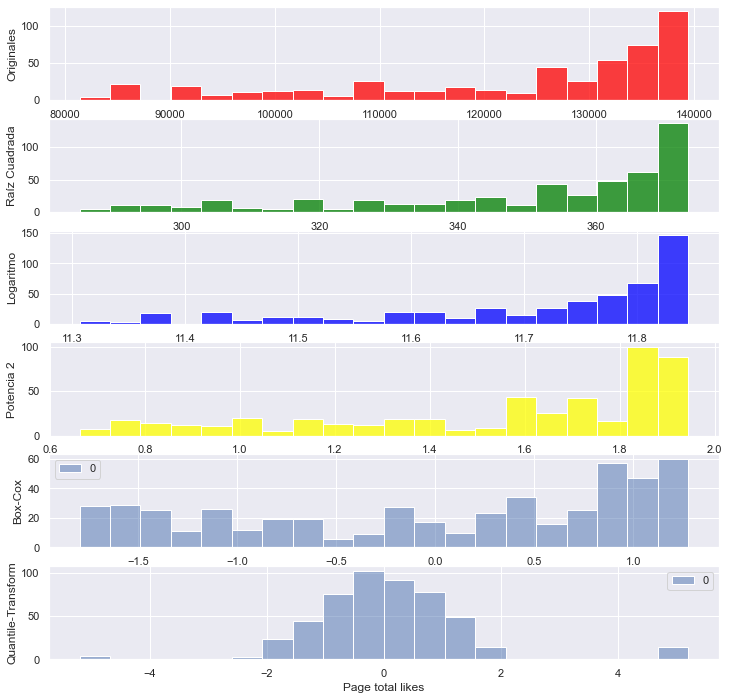

In [9]:
c_categorical = ['Type','Category','Post Month','Post Weekday','Post Hour']
c_numerical = ['Page total likes']
c_binary = ['Paid']
c_totalcat = np.append(c_categorical,c_binary,axis = 0)

c_numerical_length = len(c_numerical)
sns.set(rc={'figure.figsize':(12,12)})
fig, axes = plt.subplots(5, c_numerical_length)    

qt = QuantileTransformer(output_distribution='normal', n_quantiles=200)      # Transformación para normalizar la variable numerica  

for k in range(0,c_numerical_length):       
    plt.subplot(6,1,k+1)

    Transf0 = df[c_numerical[k]]
    sns.histplot(Transf0,color='red',bins=20)

    plt.xlabel(c_numerical[k])
    if k==0:
      plt.ylabel('Originales')
    

    plt.subplot(6,1,k+2)    

    Transf1 = df[c_numerical[k]].apply(lambda x:np.sqrt(x)) 
    sns.histplot(Transf1,color='green',bins=20)

    plt.xlabel(c_numerical[k])
    if k==0:
      plt.ylabel('Raíz Cuadrada')
    
    
    plt.subplot(6,1,k+3)     

    Transf2 = df[c_numerical[k]].apply(lambda x: np.log(x))
    sns.histplot(Transf2,color='blue',bins=20)

    plt.xlabel(c_numerical[k])
    if k==0:
      plt.ylabel('Logaritmo')


    plt.subplot(6,1,k+4)

    Transf3 = df[c_numerical[k]].apply(lambda x: x**2)
    sns.histplot(Transf3,color='Yellow',bins=20)
 
    plt.xlabel(c_numerical[k])
    if k==0:
      plt.ylabel('Potencia 2')
    

    plt.subplot(6,1,k+5)

    Transf4 = power_transform(df[c_numerical[k]].to_numpy().reshape(-1,1),method='box-cox')
    sns.histplot(Transf4,color='Gray',bins=20)

    plt.xlabel(c_numerical[k])
    if k==0:
      plt.ylabel('Box-Cox')

    plt.subplot(6,1,k+6)

    Transf5 = qt.fit_transform(df[c_numerical[k]].to_numpy().reshape(-1, 1))
    sns.histplot(Transf5,color='Gray',bins=20)

    plt.xlabel(c_numerical[k])
    if k==0:
      plt.ylabel('Quantile-Transform')
plt.show()

Análisis de las variables categoricas:

<AxesSubplot:xlabel='Post Month', ylabel='count'>

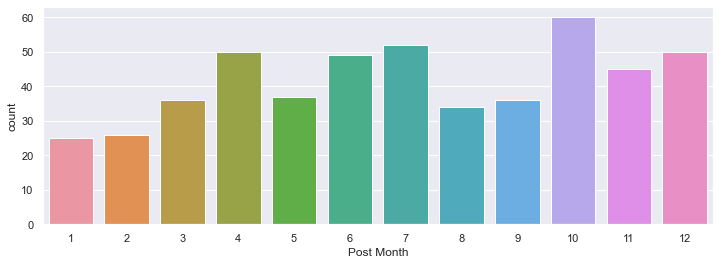

In [10]:
sns.set(rc={'figure.figsize':(12,4)})
day_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
sns.countplot(x = "Post Month", data = df, order = day_order)

<AxesSubplot:xlabel='Post Hour', ylabel='count'>

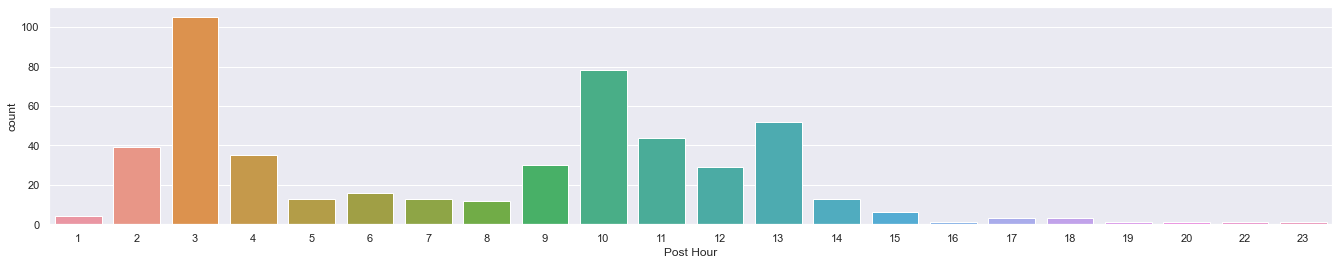

In [11]:
sns.set(rc={'figure.figsize':(23,4)})
day_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23]
sns.countplot(x = "Post Hour", data = df, order = day_order)

Se vuelve a generar la partición de los conjuntos "TV" y "Test" para que tomen en cuenta estas agrupaciónes.

In [12]:
X = df.drop({'Lifetime Post Total Reach','Lifetime Post Total Impressions','Lifetime Engaged Users','Lifetime Post Consumers','Lifetime Post Consumptions','Lifetime Post Impressions by people who have liked your Page',
             'Lifetime Post reach by people who like your Page','comment','like','share','Total Interactions','LPE'},axis=1)
y = df['LPE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=63)

Para evitar el filtrado de información (**data leakage**) se ha utilizado el siguiente Pipeline:


In [48]:
set_config(display="diagram")
numerical_tranformer_pipeline = Pipeline(steps = [('impMed', SimpleImputer(strategy='median')),
                                        ('normalize', QuantileTransformer(output_distribution='normal', n_quantiles=200))
                                        ])
categorical_tranformer_pipeline = Pipeline(steps = [('impfreq', SimpleImputer(strategy='most_frequent')),
                                                    ('oneHot', OneHotEncoder(handle_unknown='ignore'))])
columnasTransformer = ColumnTransformer(transformers = [('numerical', numerical_tranformer_pipeline, c_numerical),
                                                        ('categorical', categorical_tranformer_pipeline, c_totalcat)],
                                        remainder='passthrough')
columnasTransformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical',
                                 Pipeline(steps=[('impMed',
                                                  SimpleImputer(strategy='median')),
                                                 ('normalize',
                                                  QuantileTransformer(n_quantiles=200,
                                                                      output_distribution='normal'))]),
                                 ['Page total likes']),
                                ('categorical',
                                 Pipeline(steps=[('impfreq',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('oneHot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 array(['Type', 'Category', 'Post Month', 'Post Weekday', 'Post Hour',
       'Paid'], dtype='<U12'))])

#**Ejercicio-5.**

Uso de la **función Dummy** para modelos de regresión con el conjunto que tienes de datos de entrenamiento y validación. Los datos se han dividido en 100 (**25%**) para el conjunto de validación y 300 (**75%**) para entrenamiento. 

Referencia: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html


In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=True, random_state=63)
print('Training set size: ',X_train.shape)
print('Test set size: ',X_val.shape)
print('Y Training set size: ',y_train.shape)
print('Y test set size: ',y_val.shape)

Training set size:  (300, 7)
Test set size:  (100, 7)
Y Training set size:  (300,)
Y test set size:  (100,)


A continuación se muestran las métricas: *RMSE*, *MAE* y *MAPE* para los 
conjuntos de entrenamiento y validación. Estos resultados se han definido como los errores máximos.

In [15]:
#Resultados para el conjunto de entreamiento:
dummy_regr = DummyRegressor(strategy='mean')
dummy_regr.fit(X_train, y_train)
train_yhat = dummy_regr.predict(X_train)
print('RMSE Train: ',mi_RMSE(y_train, train_yhat))
print('MAE Train', mi_MAE(y_train,train_yhat))
print('MAPE Train', mi_MAPE(y_train,train_yhat))

RMSE Train:  597.7326695661421
MAE Train 404.58319999999867
MAPE Train 117.74996428769239


In [16]:
#Resultados para el conjunto de validación:
dummy_regr = DummyRegressor(strategy='mean')
dummy_regr.fit(X_val, y_val)
val_yhat = dummy_regr.predict(X_val)
print('RMSE Validation: ',mi_RMSE(y_val, val_yhat))
print('MAE Validation', mi_MAE(y_val,val_yhat))
print('MAPE Validation', mi_MAPE(y_val,val_yhat))

RMSE Validation:  591.1208386616056
MAE Validation 339.1566000000004
MAPE Validation 80.87126374531032


#**Ejercicio-6.**

Usando los modelos de regresión lineal múltiple (**RLM**), el bosque aleatorio (**RF**) y el perceptrón multicapa (**MLP**) con sus valores predeterminados, lleva a cabo su entrenamiento con repeticiones de validación cruzada **(RepeatedKFold)** y desplegando los errores **RMSE**, **MAE** y **MAPE**. Recuerda evitar el filtrado de información usando los datos que obtuviste en el **ejercicio 2**.

In [50]:
def get_models():
    modelos, nombres = list(), list()

    modelos.append(LinearRegression())
    nombres.append('LinearRegression')

    modelos.append(RandomForestRegressor(random_state = 63))
    nombres.append('RandomForestRegressor')

    modelos.append(MLPRegressor(
          solver = 'adam',
          activation = 'relu',
          max_iter = 500,
          random_state = 63
          ))
    nombres.append('MLPRegressor')

    return modelos, nombres

In [51]:
modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()
mismetricas = {'RMSE':make_scorer(mi_RMSE),'MAE':make_scorer(mi_MAE),'MAPE':make_scorer(mi_MAPE)}

for i in range(len(modelos)):
 
    kfold = RepeatedStratifiedKFold(n_splits=2, n_repeats=3,random_state=63)
    mi_pipe = Pipeline(steps=[('preprocessor', columnasTransformer), ('regressor', modelos[i])])

    resultados_out = cross_validate(mi_pipe, 
                          X_train, y_train,
                          scoring=mismetricas,
                          cv=kfold)
                                    
    resultados.append(resultados_out)

    print('%s:\nmean RMSE: %.3f (%.4f)\nmean MAE: %.3f (%.4f)\nmean MAPE: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultados_out['test_RMSE']),
                                                                          np.std(resultados_out['test_RMSE']),
                                                                          np.mean(resultados_out['test_MAE']),
                                                                          np.std(resultados_out['test_MAE']),
                                                                          np.mean(resultados_out['test_MAPE']),
                                                                          np.std(resultados_out['test_MAPE'])
                                                                          ))

C:\Users\hzapi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\hzapi\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2583: UserWarning: n_quantiles (200) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\hzapi\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2583: UserWarning: n_quantiles (200) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\hzapi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\hzapi\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2583: UserWarning: n_quantiles (200) is greater than the total number of samples (150). n_quantiles is set to n_sa

LinearRegression:
mean RMSE: 584.206 (16.9780)
mean MAE: 381.420 (8.2961)
mean MAPE: 106.353 (15.2285)



C:\Users\hzapi\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2583: UserWarning: n_quantiles (200) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\hzapi\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2583: UserWarning: n_quantiles (200) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\hzapi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\hzapi\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2583: UserWarning: n_quantiles (200) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\hzapi\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2583: UserWarning: n_quantiles (200) is greater than the total number of samples (150). n_quanti

RandomForestRegressor:
mean RMSE: 557.209 (21.9490)
mean MAE: 340.637 (13.5142)
mean MAPE: 84.535 (7.8574)



C:\Users\hzapi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\hzapi\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2583: UserWarning: n_quantiles (200) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\hzapi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hzapi\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2583: UserWarning: n_quantiles (200) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\hzapi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum ite

MLPRegressor:
mean RMSE: 709.051 (52.1806)
mean MAE: 410.212 (7.1538)
mean MAPE: 57.233 (8.8880)



C:\Users\hzapi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Conclusiones sobre el mejor modelo encontrado en esta primera aproximación. En particular, ¿hay algún sobreentrenado o subentrenado? 

En relación a los tres modelos probados en este paso: Regresión Lineal, Random Forest y Perceptrón Multicapa, los tres obtuvieron mejores métricas vs. el modelo dummy. De los tres modelos el que tiene las mejores métricas es el Random Forest (*RF) siendo en el indicador de Error absoluto medio porcentual (MAPE) donde mejor se desempeñó.  En el caso del **MLP* fue 14.4% menor y en la comparación con la Regresión lineal se comportó un 13.7% menor.

#**Ejercicio-7.**

Se muestran los **Diagramas de caja y bigote** para los errores **MAPE** de los **conjuntos de validación** obtenido. 

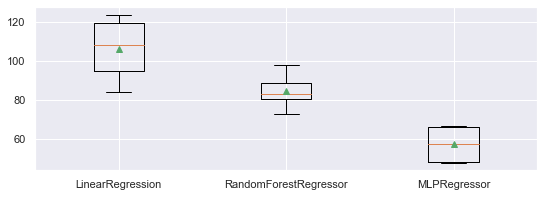

In [52]:
sns.set(rc={'figure.figsize':(9,3)})
rmse_resultados = list()
mae_resultados = list()
mape_resultados = list()
for i in range(len(resultados)):
    rmse_resultados.append(resultados[i]['test_RMSE'])
    mae_resultados.append(resultados[i]['test_MAE'])
    mape_resultados.append(resultados[i]['test_MAPE'])

plt.boxplot(mape_resultados, labels=nombres, showmeans=True)
plt.show()

En particular, compara estos primeros resultados de MAPE con el mejor resultado que encuentran los autores del artículo citado al inicio. Incluye tus conclusiones.

**Conclusiones:**

Se puede determinar de primera instancia que el modelo MLP es el que tiene un mejor resultado de MAPE inclusive antes de ser entrenado con los hiperparámetros óptimos.

#**Ejercicio-8.**

Busqueda de los mejores hiperparámetros para el modelo Multi Layer Perceptron (**MLP**) usando una búsqueda de malla con validación cruzada (**GridSearchCV**). 

Los hiperparámetros en los que se ha puesto foco son los siguientes: “**hidden_layer_sizes**”, “**alpha**” y “**learning_rate_init**”. 

También se ha aplicado la validación cruzada con repeticiones 
(**RepeatedKFold**), a continuación se muestran los mejores hiperparámetros encontrados:


In [37]:
modelo_mlp = MLPRegressor(
          solver = 'adam',
          activation = 'relu',
          max_iter= 500,
          random_state = 63)


kfold = RepeatedStratifiedKFold(n_splits=2, n_repeats=3,random_state=63)
mi_pipe_mlp = Pipeline(steps=[('preprocessor', columnasTransformer), ('regressor', modelo_mlp)])

param_grid = { 
    'regressor__alpha': [0.00001,0.0001,.01,.1],
    'regressor__learning_rate_init' : [0.00001,0.0001,.01,.1],
    "regressor__hidden_layer_sizes": [(5,),(10,),(20,)]
}

grid = GridSearchCV(estimator=mi_pipe_mlp,
                        param_grid=param_grid, 
                        cv=kfold, 
                        scoring=make_scorer(mi_MAPE),
                        n_jobs=-1)

grid.fit(X_train, y_train)

print('Mejor valor de MAPE obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

C:\Users\hzapi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\hzapi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\hzapi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Mejor valor de MAPE obtenido con la mejor combinación: 113.61106888718787
Mejor combinación de valores encontrados de los hiperparámetros: {'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (20,), 'regressor__learning_rate_init': 0.1}
Métrica utilizada: make_scorer(mi_MAPE)


C:\Users\hzapi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


#**Ejercicio-9.**

Con los mejores valores de los hiperparámetros encontrados realiza un análisis de la importancia de los factores. 

In [38]:
modelo_MLP = MLPRegressor(hidden_layer_sizes=(20,), 
                            max_iter=500, 
                            alpha=0.1,
                            learning_rate_init=0.1)  
mi_pipe_mlp = Pipeline(steps=[('preprocessor', columnasTransformer), ('regressor', modelo_mlp)])
mi_pipe_mlp.fit(X_train, y_train)

Xx = columnasTransformer.fit(X_train)
Xx_test = Xx.transform(X_test)
modelo_MLP.fit(Xx_test, np.ravel(y_test))

importance_mlp = permutation_importance(modelo_MLP, Xx_test.toarray(), y_test, n_repeats=10)

# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importance_mlp['importances_mean']):
    print('Feature: %0d, Score: %.5f' % (i,v))

C:\Users\hzapi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hzapi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature: 0, Score: 0.03985
Feature: 1, Score: 0.03410
Feature: 2, Score: 0.15643
Feature: 3, Score: 0.33325
Feature: 4, Score: 0.00933
Feature: 5, Score: 0.07734
Feature: 6, Score: 0.01464
Feature: 7, Score: 0.02587
Feature: 8, Score: 0.00256
Feature: 9, Score: 0.01462
Feature: 10, Score: 0.03824
Feature: 11, Score: 0.00670
Feature: 12, Score: 0.00391
Feature: 13, Score: 0.00810
Feature: 14, Score: 0.04180
Feature: 15, Score: 0.11311
Feature: 16, Score: 0.00935
Feature: 17, Score: 0.00612
Feature: 18, Score: 0.01936
Feature: 19, Score: 0.02837
Feature: 20, Score: 0.20670
Feature: 21, Score: 0.06390
Feature: 22, Score: 0.10347
Feature: 23, Score: 0.02012
Feature: 24, Score: 0.06849
Feature: 25, Score: 0.01693
Feature: 26, Score: 0.05701
Feature: 27, Score: 0.00193
Feature: 28, Score: 0.02864
Feature: 29, Score: 0.01995
Feature: 30, Score: 0.03511
Feature: 31, Score: 0.01783
Feature: 32, Score: 0.01115
Feature: 33, Score: 0.00812
Feature: 34, Score: 0.04598
Feature: 35, Score: 0.02747
Fe

En el siguiente **diagrama de barras** se muestran los resultados:

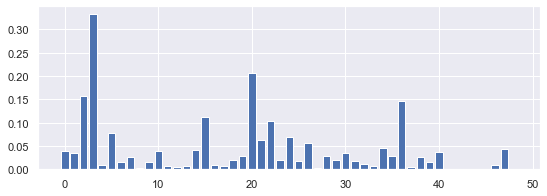

In [39]:
plt.bar([x for x in range(len(importance_mlp['importances_mean']))], importance_mlp['importances_mean'])
plt.show()

**Conclusiones:** 

Si bien todas las variables de entrada tienen un nivel de significancia para el modelo MLP se puede observar que existen 6 variables de suma importancia para el modelo MLP. No obstante dado que el MAPE se degrado quizás estos no sean los hiperparámetros adecuados para el modelo por lo que se debería de buscar alternativas de "feauture engineering" para reducir el ruido de clases desbalanceadas.

#**Ejercicio-10.**

Repetición de los **ejercicios 8** y **9** para el modelo de bosque aleatorio (**RF**) usando el conjunto de prueba (**Test**) en busqueda de sus mejores hiperparámetros.

Los hiperparámetros que se consideraron más adecuados fueron: 


In [31]:
modelo_rf = RandomForestRegressor()


kfold = RepeatedStratifiedKFold(n_splits=2, n_repeats=3,random_state=63)
mi_pipe_rf = Pipeline(steps=[('preprocessor', columnasTransformer), ('regressor', modelo_rf)])

param_grid = { 
    "regressor__n_estimators": [50, 100, 200],
    "regressor__max_depth": [3,7,10],
    'regressor__min_samples_split': [2,3,5]
}

grid = GridSearchCV(estimator=mi_pipe_rf,
                        param_grid=param_grid, 
                        cv=kfold, 
                        scoring=make_scorer(mi_MAPE),
                        n_jobs=-1)

grid.fit(X_test, y_test)

print('Mejor valor de MAPE obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

C:\Users\hzapi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\hzapi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\hzapi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Mejor valor de MAPE obtenido con la mejor combinación: 239.92545378956447
Mejor combinación de valores encontrados de los hiperparámetros: {'regressor__max_depth': 3, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 50}
Métrica utilizada: make_scorer(mi_MAPE)


C:\Users\hzapi\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2583: UserWarning: n_quantiles (200) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(


In [34]:
modelo_rf = RandomForestRegressor(n_estimators = 10,
                                  min_samples_split = 5, 
                                  max_depth = 3)  

Xx = columnasTransformer.fit(X_train)
Xx_test = Xx.transform(X_test)
modelo_rf.fit(Xx_test, np.ravel(y_test))

importance_rf = permutation_importance(modelo_rf, Xx_test.toarray(), y_test, n_repeats=10)

# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importance_rf['importances_mean']):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.03027
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.86752
Feature: 4, Score: 0.00348
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: -0.00021
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00151
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00484
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.01101
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.01499
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.06617
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
F

Diagrama de barras que muestra el análisis de **importancia de factores** con este modelo:

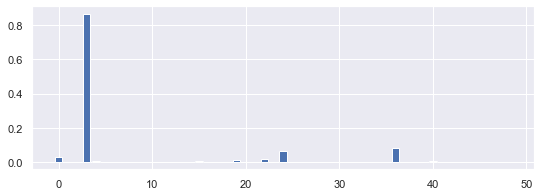

In [35]:
plt.bar([x for x in range(len(importance_rf['importances_mean']))], importance_rf['importances_mean'])
plt.show()

#**Ejercicio-11.**

Repetición de los ejercicios 8 y 9 para el modelo de regresión lineal multiple (**RLM**) usando el conjunto de prueba (Test) en busqueda de sus mejores hiperparámetros.

Los hiperparámetros que se consideraron más adecuados fueron:

In [54]:
modelo_lr = LinearRegression()


kfold = RepeatedStratifiedKFold(n_splits=2, n_repeats=3,random_state=63)
mi_pipe_lr = Pipeline(steps=[('preprocessor', columnasTransformer), ('regressor', modelo_lr)])

param_grid = {
    "preprocessor__numerical__impMed__strategy": ['mean','median'],
    "regressor__fit_intercept": [True, False],
    "regressor__positive": [False, True],
}
grid = GridSearchCV(estimator=mi_pipe_lr,
                        param_grid=param_grid, 
                        cv=kfold, 
                        scoring=make_scorer(mi_MAPE),
                        n_jobs=-1)

grid.fit(X_test, y_test)

print('Mejor valor de MAPE obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

C:\Users\hzapi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\hzapi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\hzapi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Mejor valor de MAPE obtenido con la mejor combinación: 695.4317409362892
Mejor combinación de valores encontrados de los hiperparámetros: {'preprocessor__numerical__impMed__strategy': 'mean', 'regressor__fit_intercept': False, 'regressor__positive': False}
Métrica utilizada: make_scorer(mi_MAPE)


C:\Users\hzapi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hzapi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hzapi\anaconda3\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\hzapi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py", line 684, in fit
    X, y = self._validate_data(
  File "C:\Users\hzapi\anac

Diagrama de barras que muestra el análisis de importancia de factores con este modelo:

In [55]:
modelo_lr = LinearRegression(strategy = 'mean',
                                  fit_intercept = False, 
                                  positive = False)  

Xx = columnasTransformer.fit(X_train)
Xx_test = Xx.transform(X_test)
modelo_rf.fit(Xx_test, np.ravel(y_test))

importance_rf = permutation_importance(modelo_rf, Xx_test.toarray(), y_test, n_repeats=10)

# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importance_rf['importances_mean']):
    print('Feature: %0d, Score: %.5f' % (i,v))

TypeError: __init__() got an unexpected keyword argument 'strategy'

In [ ]:
plt.bar([x for x in range(len(importance_lr['importances_mean']))], importance_rf['importances_mean'])
plt.show()

#**Ejercicio-12.**

Compara tus resultados con los obtenidos por los autores del artículo de **Moro-Rita-Vala** con respecto al **MAPE**. 

Conclusiones finales de la actividad:  El error absoluto medio porcentual (*MAPE) que obtuvieron los autores y que se informa en el artículo 26.9% comparado con el mejor resultado, hasta este punto, que corresponde al modelo de MLP. Lo anterior se puede entender toda vez que existe una porción importante de revisión de variables de entrada y realizar reacomodos de información clave.

###**Fin de la Actividad de la semana 7.**